The Battle of The Neighborhoods - Final assignment - Week 5 - Code

Importing relevant libraries

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import requests # library to handle requests

#from bs4 import BeautifulSoup
import os

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
!pip install folium # map rendering library

#!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import requests # library to handle requests

# Matplotlib and associated plotting modules
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
%matplotlib inline

import seaborn as sns

print('Libraries imported.')

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: / 
Found conflicts! Looking for incompatible packages.
This can take several minutes.  Press CTRL-C to abort.
                                                                                       -         /            /failed

UnsatisfiableError: The following specifications were found
to be incompatible with the existing python installation in your environment:

Specifications:

  - cffi -> python[version='2.7.*|3.5.*|3.6.*|3.6.12|>=3.6,<3.7.0a0|>=3.7,<3.8.0a0|>=3.9,<3.10.0a0|>=3.8,<3.9.0a0|3.6.9|3.6.9|3.6.9|>=2.7,<2.8.0a0|3.6.9|>=3.5,<3.6.0a0|3.4.*',build='0_73_pypy|1_73_pypy|4_73_pypy|3_73_pypy|2_73_pypy']
  - rsa -> python[version='2.7.*|3.4.*|3.5.*|3.6.*']

Your python: python=3.7

If python is on the left-most side of the chain, that's the version you've asked for.
When python appears to th

     |████████████████████████████████| 93 kB 3.8 MB/s  eta 0:00:01
Libraries imported.


Scrapimg location data from Wikipedia

In [2]:
# scrape wikipedia

from bs4 import BeautifulSoup
website_text = requests.get('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M').text
soup = BeautifulSoup(website_text,'xml')

table = soup.find('table',{'class':'wikitable sortable'})
table_rows = table.find_all('tr')

data = []
for row in table_rows:
    data.append([t.text.strip() for t in row.find_all('td')])

df = pd.DataFrame(data, columns=['PostalCode', 'Borough', 'Neighbourhood'])
df = df[~df['PostalCode'].isnull()]  # filters out bad rows
display (df)

,PostalCode,Borough,Neighbourhood
1,M1A,Not assigned,Not assigned
2,M2A,Not assigned,Not assigned
3,M3A,North York,Parkwoods
4,M4A,North York,Victoria Village
5,M5A,Downtown Toronto,"Regent Park, Harbourfront"
6,M6A,North York,"Lawrence Manor, Lawrence Heights"
7,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
8,M8A,Not assigned,Not assigned
9,M9A,Etobicoke,"Islington Avenue, Humber Valley Village"
10,M1B,Scarborough,"Malvern, Rouge"


Pre-processing of data

In [3]:
#Delete rows where Borough is 'Not assigned'
df = df[df.Borough!= "Not assigned"]

#Combine all neighbourhoods where postcode and Borough are the same
df = df.groupby(['PostalCode', 'Borough'])['Neighbourhood'].apply(list).apply(lambda x:', '.join(x)).to_frame().reset_index()
#if Neighbourhood is not assigned, replace by borough name
for index, row in df.iterrows():
    if row['Neighbourhood'] == 'Not assigned':
        row['Neighbourhood'] = row['Borough']

# define the dataframe columns
column_names = ['PostalCode','Borough', 'Neighbourhood'] 

# instantiate the dataframe
df.columns = column_names

# latitude and longitude
import io
url="https://cocl.us/Geospatial_data"
s=requests.get(url).content
c=pd.read_csv(io.StringIO(s.decode('utf-8')))

dfcodes = df.join(c.set_index('Postal Code'), on='PostalCode')
del dfcodes ['PostalCode']
display (dfcodes)

,Borough,Neighbourhood,Latitude,Longitude
0,Scarborough,"Malvern, Rouge",43.806686,-79.194353
1,Scarborough,"Rouge Hill, Port Union, Highland Creek",43.784535,-79.160497
2,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,Scarborough,Woburn,43.770992,-79.216917
4,Scarborough,Cedarbrae,43.773136,-79.239476
5,Scarborough,Scarborough Village,43.744734,-79.239476
6,Scarborough,"Kennedy Park, Ionview, East Birchmount Park",43.727929,-79.262029
7,Scarborough,"Golden Mile, Clairlea, Oakridge",43.711112,-79.284577
8,Scarborough,"Cliffside, Cliffcrest, Scarborough Village West",43.716316,-79.239476
9,Scarborough,"Birch Cliff, Cliffside West",43.692657,-79.264848


In [4]:
# shape of dataframe
dfcodes.shape

(103, 4)

Visualization od data reflecting number of neighborhoods per borough.

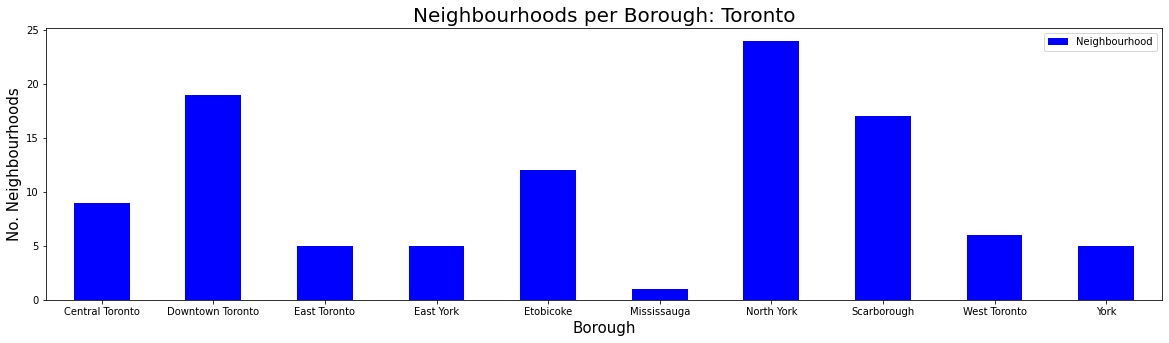

In [5]:
clr = "blue"
dfcodes.groupby('Borough')['Neighbourhood'].count().plot.bar(figsize=(20,5), color=clr)
plt.title('Neighbourhoods per Borough: Toronto', fontsize = 20)
plt.xlabel('Borough', fontsize = 15)
plt.ylabel('No. Neighbourhoods',fontsize = 15)
plt.xticks(rotation = 'horizontal')
plt.legend()
plt.show()

Defining functions to be used in analysis.

In [6]:
def geo_location(address):
    # get geo location of address
    geolocator = Nominatim(user_agent="foursquare_agent")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    return latitude,longitude


def get_venues(lat,lng):
    #set variables
    radius=400
    LIMIT=100
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
    # get all the data
    results = requests.get(url).json()
    venue_data=results['response']['groups'][0]['items']
    venue_details=[]
    for row in venue_data:
        try:
            venue_id=row['venue']['id']
            venue_name=row['venue']['name']
            venue_category=row['venue']['categories'][0]['name']
            venue_details.append([venue_id,venue_name,venue_category])
        except KeyError:
            pass
    column_names=['ID','Name','Category']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df


def get_venue_details(venue_id):
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}'.format(
            venue_id,
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION)
    # get all the data
    results = requests.get(url).json()
    print(results)
    venue_data=results['response']['venue']
    venue_details=[]
    try:
        venue_id=venue_data['id']
        venue_name=venue_data['name']
        venue_likes=venue_data['likes']['count']
        venue_rating=venue_data['rating']
        venue_tips=venue_data['tips']['count']
        venue_details.append([venue_id,venue_name,venue_likes,venue_rating,venue_tips])
    except KeyError:
        pass
    column_names=['ID','Name','Likes','Rating','Tips']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df

Defining Foursquare credentials.

In [7]:
# Define Four Square Credentials
CLIENT_ID = 'EUI3QTRP3WXDQJQFEZFK4ICJ3USI4MHBR44TEOODJSFIE3DD' # your Foursquare ID
CLIENT_SECRET = 'GLWQPVXHTGPRADQ0I1HYXEPHP3DDD2SFVECMCLOA2XNTJKQG' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: EUI3QTRP3WXDQJQFEZFK4ICJ3USI4MHBR44TEOODJSFIE3DD
CLIENT_SECRET:GLWQPVXHTGPRADQ0I1HYXEPHP3DDD2SFVECMCLOA2XNTJKQG


Call the Foursquare API to produce a list of Italian restaurants from their database within the defined area.

In [8]:
# prepare neighborhood list that contains italian restaurants
column_names=['Borough', 'Neighbourhood', 'ID','Name']
italian_rest_tor=pd.DataFrame(columns=column_names)
count=1
for row in dfcodes.values.tolist():
    Borough, Neighborhood, Latitude, Longitude=row
    venues = get_venues(Latitude,Longitude)
    italian_restaurants=venues[venues['Category']=='Italian Restaurant']   
    print('(',count,'/',len(dfcodes),')','Italian Restaurants in '+Neighborhood+', '+Borough+':'+str(len(italian_restaurants)))
    print(row)
    for resturant_detail in italian_restaurants.values.tolist():
        id, name , category=resturant_detail
        italian_rest_tor = italian_rest_tor.append({'Borough': Borough,
                                                'Neighbourhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name
                                               }, ignore_index=True)
    count+=1

( 1 / 103 ) Italian Restaurants in Malvern, Rouge, Scarborough:0
['Scarborough', 'Malvern, Rouge', 43.806686299999996, -79.19435340000001]
( 2 / 103 ) Italian Restaurants in Rouge Hill, Port Union, Highland Creek, Scarborough:0
['Scarborough', 'Rouge Hill, Port Union, Highland Creek', 43.7845351, -79.16049709999999]
( 3 / 103 ) Italian Restaurants in Guildwood, Morningside, West Hill, Scarborough:0
['Scarborough', 'Guildwood, Morningside, West Hill', 43.7635726, -79.1887115]
( 4 / 103 ) Italian Restaurants in Woburn, Scarborough:0
['Scarborough', 'Woburn', 43.7709921, -79.21691740000001]
( 5 / 103 ) Italian Restaurants in Cedarbrae, Scarborough:0
['Scarborough', 'Cedarbrae', 43.773136, -79.23947609999999]
( 6 / 103 ) Italian Restaurants in Scarborough Village, Scarborough:0
['Scarborough', 'Scarborough Village', 43.7447342, -79.23947609999999]
( 7 / 103 ) Italian Restaurants in Kennedy Park, Ionview, East Birchmount Park, Scarborough:0
['Scarborough', 'Kennedy Park, Ionview, East Birch

( 56 / 103 ) Italian Restaurants in St. James Town, Downtown Toronto:1
['Downtown Toronto', 'St. James Town', 43.6514939, -79.3754179]
( 57 / 103 ) Italian Restaurants in Berczy Park, Downtown Toronto:1
['Downtown Toronto', 'Berczy Park', 43.644770799999996, -79.3733064]
( 58 / 103 ) Italian Restaurants in Central Bay Street, Downtown Toronto:4
['Downtown Toronto', 'Central Bay Street', 43.6579524, -79.3873826]
( 59 / 103 ) Italian Restaurants in Richmond, Adelaide, King, Downtown Toronto:0
['Downtown Toronto', 'Richmond, Adelaide, King', 43.65057120000001, -79.3845675]
( 60 / 103 ) Italian Restaurants in Harbourfront East, Union Station, Toronto Islands, Downtown Toronto:3
['Downtown Toronto', 'Harbourfront East, Union Station, Toronto Islands', 43.6408157, -79.38175229999999]
( 61 / 103 ) Italian Restaurants in Toronto Dominion Centre, Design Exchange, Downtown Toronto:1
['Downtown Toronto', 'Toronto Dominion Centre, Design Exchange', 43.6471768, -79.38157640000001]
( 62 / 103 ) Ital

Save the information so far to a .csv file due to limited calls on FourSquare

In [9]:
#italian_rest_tor.to_csv('italian_rest_tor_tocsv1.csv') # Save the information so far to a .csv file due to limited calls on FourSquare
italian_rest_tor.to_csv('italian_rest_tor_tocsv1.csv')

Read italian restuarant data into a dataframe and display.

In [10]:
italian_tor = pd.read_csv('italian_rest_tor_tocsv1.csv')
display(italian_rest_tor)

,Borough,Neighbourhood,ID,Name
0,North York,Don Mills,4bdaff7463c5c9b67bcb2568,Sorento Restaurant
1,East Toronto,"The Danforth West, Riverdale",4e3dbb5e45dd68e3273e03b7,Cafe Fiorentina
2,East Toronto,"The Danforth West, Riverdale",4af4e0d0f964a5202ff721e3,7 Numbers
3,East Toronto,"India Bazaar, The Beaches West",4ba0153bf964a520995837e3,Casa di Giorgio
4,East Toronto,Studio District,4b1169f6f964a520177c23e3,Baldini
5,Central Toronto,Davisville,4bd4b2546798ef3bb235628d,Florentia Ristorante
6,Central Toronto,Davisville,4b71edddf964a520cb642de3,Positano
7,Downtown Toronto,"St. James Town, Cabbagetown",4e4e7aa06365e1419d021044,F'Amelia
8,Downtown Toronto,"Garden District, Ryerson",52f6816f11d24a43115dc834,Scaddabush Italian Kitchen & Bar
9,Downtown Toronto,"Garden District, Ryerson",4d306dd82748b60c62b6dba0,Trattoria Mercatto


In [11]:
italian_rest_tor.shape

(33, 4)

Visualization of Italian Restuarants by Borough

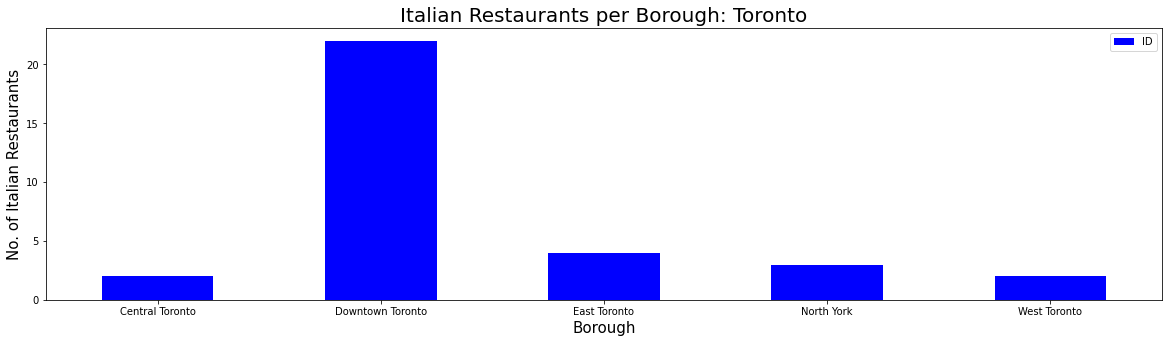

In [12]:
italian_rest_tor.groupby('Borough')['ID'].count().plot.bar(figsize=(20,5), color=clr)
plt.title('Italian Restaurants per Borough: Toronto', fontsize = 20)
plt.xlabel('Borough', fontsize = 15)
plt.ylabel('No. of Italian Restaurants', fontsize=15)
plt.xticks(rotation = 'horizontal')
plt.legend()
plt.show()

Visualization of Italian Restuarants by Neighborhood.

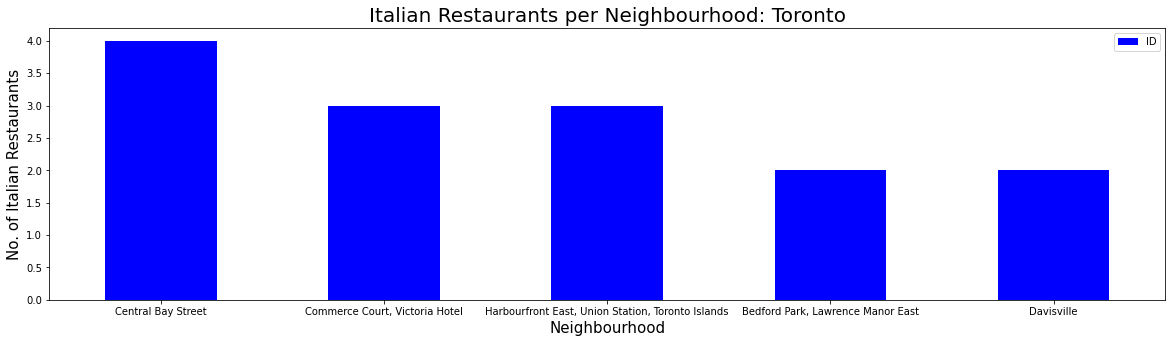

In [13]:
NOofNeigh = 5 # top number for graphing all the same past 5
italian_rest_tor.groupby('Neighbourhood')['ID'].count().nlargest(NOofNeigh).plot.bar(figsize=(20,5), color=clr)
plt.title('Italian Restaurants per Neighbourhood: Toronto', fontsize = 20)
plt.xlabel('Neighbourhood', fontsize = 15)
plt.ylabel('No. of Italian Restaurants', fontsize=15)
plt.xticks(rotation = 'horizontal')
plt.legend()
plt.show()

Retrieving characteristics data from Foursquare.

In [14]:
column_names=['Borough', 'Neighbourhood', 'ID','Name','Likes','Rating','Tips']
italian_rest_stats_tor=pd.DataFrame(columns=column_names)
count=1
for row in italian_rest_tor.values.tolist():
    Borough,Neighborhood,ID,Name=row
    try:
        venue_details=get_venue_details(ID)
        print(venue_details)
        id,name,likes,rating,tips=venue_details.values.tolist()[0]
    except IndexError:
        print('No data available for id=',ID)
        # we will assign 0 value for these resturants as they may have been 
        #recently opened or details does not exist in FourSquare Database
        id,name,likes,rating,tips=[0]*5
    print('(',count,'/',len(italian_rest_tor),')','processed')
    italian_rest_stats_tor = italian_rest_stats_tor.append({'Borough': Borough,
                                                'Neighbourhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name,
                                                'Likes' : likes,
                                                'Rating' : rating,
                                                'Tips' : tips
                                               }, ignore_index=True)
    count+=1
display(italian_rest_stats_tor)

{'meta': {'code': 200, 'requestId': '5fd8b7570c79573f86cc40e5'}, 'response': {'venue': {'id': '4bdaff7463c5c9b67bcb2568', 'name': 'Sorento Restaurant', 'contact': {'phone': '4164473590', 'formattedPhone': '(416) 447-3590'}, 'location': {'address': '900 Don Mills Rd.', 'lat': 43.72657509457231, 'lng': -79.34198930569546, 'labeledLatLngs': [{'label': 'display', 'lat': 43.72657509457231, 'lng': -79.34198930569546}], 'cc': 'CA', 'city': 'Toronto', 'state': 'ON', 'country': 'Canada', 'formattedAddress': ['900 Don Mills Rd.', 'Toronto ON', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/sorento-restaurant/4bdaff7463c5c9b67bcb2568', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix': '.png'}, 'primary': True}, {'id': '4bf58dd8d48988d1c0941735', 'name': 'Mediterranean Restaurant', 'pluralName': 'Mediterranean Restaur

{'meta': {'code': 200, 'requestId': '5fd8b7581d98ae664e04b516'}, 'response': {'venue': {'id': '4af4e0d0f964a5202ff721e3', 'name': '7 Numbers', 'contact': {'phone': '4164695183', 'formattedPhone': '(416) 469-5183', 'twitter': '7_numbers'}, 'location': {'address': '307 Danforth Ave.', 'crossStreet': 'at Bowden St', 'lat': 43.677061774959824, 'lng': -79.35393428891682, 'labeledLatLngs': [{'label': 'display', 'lat': 43.677061774959824, 'lng': -79.35393428891682}], 'cc': 'CA', 'city': 'Toronto', 'state': 'ON', 'country': 'Canada', 'formattedAddress': ['307 Danforth Ave. (at Bowden St)', 'Toronto ON', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/7-numbers/4af4e0d0f964a5202ff721e3', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 25}, 'url':

{'meta': {'code': 200, 'requestId': '5fd8b758f2e0d82e0b866e97'}, 'response': {'venue': {'id': '4b1169f6f964a520177c23e3', 'name': 'Baldini', 'contact': {'phone': '4168491233', 'formattedPhone': '(416) 849-1233'}, 'location': {'address': '1012 Queen St East', 'crossStreet': 'at Boston Ave', 'lat': 43.661299966369135, 'lng': -79.33902686943661, 'labeledLatLngs': [{'label': 'display', 'lat': 43.661299966369135, 'lng': -79.33902686943661}], 'cc': 'CA', 'city': 'Toronto', 'state': 'ON', 'country': 'Canada', 'formattedAddress': ['1012 Queen St East (at Boston Ave)', 'Toronto ON', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/baldini/4b1169f6f964a520177c23e3', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix': '.png'}, 'primary': True}], 'verified': True, 'stats': {'tipCount': 11}, 'url': 'http://www.baldiniresta

{'meta': {'code': 200, 'requestId': '5fd8b7584fbdfc4a2d8b8da2'}, 'response': {'venue': {'id': '4b71edddf964a520cb642de3', 'name': 'Positano', 'contact': {'phone': '4169323982', 'formattedPhone': '(416) 932-3982'}, 'location': {'address': '633 Mt. Pleasant Rd.', 'crossStreet': 'btwn. Hillsdale Ave. E and Manor Rd. E', 'lat': 43.704558, 'lng': -79.38863854, 'labeledLatLngs': [{'label': 'display', 'lat': 43.704558, 'lng': -79.38863854}], 'postalCode': 'M4S 2M9', 'cc': 'CA', 'city': 'Toronto', 'state': 'ON', 'country': 'Canada', 'formattedAddress': ['633 Mt. Pleasant Rd. (btwn. Hillsdale Ave. E and Manor Rd. E)', 'Toronto ON M4S 2M9', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/positano/4b71edddf964a520cb642de3', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix': '.png'}, 'primary': True}], 'verified': False

{'meta': {'code': 200, 'requestId': '5fd8b759f2e0d82e0b86706c'}, 'response': {'venue': {'id': '52f6816f11d24a43115dc834', 'name': 'Scaddabush Italian Kitchen & Bar', 'contact': {'phone': '4165978838', 'formattedPhone': '(416) 597-8838', 'twitter': 'scaddabush'}, 'location': {'address': '382 Yonge Street, Unit #7', 'crossStreet': 'Gerrard', 'lat': 43.658920292028725, 'lng': -79.38289105381784, 'labeledLatLngs': [{'label': 'display', 'lat': 43.658920292028725, 'lng': -79.38289105381784}], 'postalCode': 'M5B 1S8', 'cc': 'CA', 'city': 'Toronto', 'state': 'ON', 'country': 'Canada', 'formattedAddress': ['382 Yonge Street, Unit #7 (Gerrard)', 'Toronto ON M5B 1S8', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/scaddabush-italian-kitchen--bar/52f6816f11d24a43115dc834', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suff

{'meta': {'code': 200, 'requestId': '5fd8b7595b96957c3347c39a'}, 'response': {'venue': {'id': '4d306dd82748b60c62b6dba0', 'name': 'Trattoria Mercatto', 'contact': {'phone': '6473523390', 'formattedPhone': '(647) 352-3390'}, 'location': {'address': '220 Yonge St.', 'crossStreet': 'in Toronto Eaton Centre', 'lat': 43.65445314470199, 'lng': -79.3809741075674, 'labeledLatLngs': [{'label': 'display', 'lat': 43.65445314470199, 'lng': -79.3809741075674}], 'postalCode': 'M5B 3H7', 'cc': 'CA', 'city': 'Toronto', 'state': 'ON', 'country': 'Canada', 'formattedAddress': ['220 Yonge St. (in Toronto Eaton Centre)', 'Toronto ON M5B 3H7', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/trattoria-mercatto/4d306dd82748b60c62b6dba0', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix': '.png'}, 'primary': True}, {'id': '4bf58dd8

{'meta': {'code': 200, 'requestId': '5fd8b759383e6d764f4ff9a2'}, 'response': {'venue': {'id': '4ada4b1ef964a520022121e3', 'name': 'The Old Spaghetti Factory', 'contact': {'phone': '4168649761', 'formattedPhone': '(416) 864-9761', 'twitter': 'spagnation', 'facebook': '131452060218735', 'facebookUsername': 'OldSpaghettiFactoryTO', 'facebookName': 'The Old Spaghetti Factory Toronto'}, 'location': {'address': '54 The Esplanade', 'crossStreet': 'btwn Yonge & Church St', 'lat': 43.64696445846655, 'lng': -79.37440258334287, 'labeledLatLngs': [{'label': 'display', 'lat': 43.64696445846655, 'lng': -79.37440258334287}], 'postalCode': 'M5E 1A6', 'cc': 'CA', 'city': 'Toronto', 'state': 'ON', 'country': 'Canada', 'formattedAddress': ['54 The Esplanade (btwn Yonge & Church St)', 'Toronto ON M5E 1A6', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/the-old-spaghetti-factory/4ada4b1ef964a520022121e3', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': '

{'meta': {'code': 200, 'requestId': '5fd8b75ab945750a9ba3bdc2'}, 'response': {'venue': {'id': '52f6816f11d24a43115dc834', 'name': 'Scaddabush Italian Kitchen & Bar', 'contact': {'phone': '4165978838', 'formattedPhone': '(416) 597-8838', 'twitter': 'scaddabush'}, 'location': {'address': '382 Yonge Street, Unit #7', 'crossStreet': 'Gerrard', 'lat': 43.658920292028725, 'lng': -79.38289105381784, 'labeledLatLngs': [{'label': 'display', 'lat': 43.658920292028725, 'lng': -79.38289105381784}], 'postalCode': 'M5B 1S8', 'cc': 'CA', 'city': 'Toronto', 'state': 'ON', 'country': 'Canada', 'formattedAddress': ['382 Yonge Street, Unit #7 (Gerrard)', 'Toronto ON M5B 1S8', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/scaddabush-italian-kitchen--bar/52f6816f11d24a43115dc834', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suff

{'meta': {'code': 200, 'requestId': '5fd8b75a4bf6557d3573de38'}, 'response': {'venue': {'id': '529d18c911d255c5406ddd88', 'name': 'Pizzeria Via Mercanti', 'contact': {'phone': '4169011899', 'formattedPhone': '(416) 901-1899', 'twitter': 'via_mercanti'}, 'location': {'address': '87 Elm St', 'crossStreet': 'Btwn University Ave & Elizabeth St', 'lat': 43.65679034740686, 'lng': -79.38631071713952, 'labeledLatLngs': [{'label': 'display', 'lat': 43.65679034740686, 'lng': -79.38631071713952}], 'postalCode': 'M5G 0A8', 'cc': 'CA', 'city': 'Toronto', 'state': 'ON', 'country': 'Canada', 'formattedAddress': ['87 Elm St (Btwn University Ave & Elizabeth St)', 'Toronto ON M5G 0A8', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/pizzeria-via-mercanti/529d18c911d255c5406ddd88', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suf

{'meta': {'code': 200, 'requestId': '5fd8b75ae4e5a913aeeb23b9'}, 'response': {'venue': {'id': '4b6c9b5ff964a52027462ce3', 'name': 'Piazza Manna', 'contact': {'phone': '4169550702', 'formattedPhone': '(416) 955-0702'}, 'location': {'address': '10 Bay St.', 'crossStreet': 'at Water Park Place', 'lat': 43.641460067165184, 'lng': -79.37771914472566, 'labeledLatLngs': [{'label': 'display', 'lat': 43.641460067165184, 'lng': -79.37771914472566}], 'postalCode': 'M5J 2R8', 'cc': 'CA', 'city': 'Toronto', 'state': 'ON', 'country': 'Canada', 'formattedAddress': ['10 Bay St. (at Water Park Place)', 'Toronto ON M5J 2R8', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/piazza-manna/4b6c9b5ff964a52027462ce3', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCoun

{'meta': {'code': 200, 'requestId': '5fd8b75b0c72d872acb9634f'}, 'response': {'venue': {'id': '5a23467c47f8762eb7bdfc90', 'name': 'Amano Pasta', 'contact': {'phone': '6473500092', 'formattedPhone': '(647) 350-0092', 'instagram': 'eat.amano'}, 'location': {'address': '65 FRONT ST W', 'lat': 43.64491852117436, 'lng': -79.38235777637108, 'labeledLatLngs': [{'label': 'display', 'lat': 43.64491852117436, 'lng': -79.38235777637108}], 'postalCode': 'M5J', 'cc': 'CA', 'city': 'Toronto', 'state': 'ON', 'country': 'Canada', 'formattedAddress': ['65 FRONT ST W', 'Toronto ON M5J', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/amano-pasta/5a23467c47f8762eb7bdfc90', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 5}, 'url': 'https://eatamano.com', '

( 21 / 33 ) processed
{'meta': {'code': 200, 'requestId': '5fd8b75b3878a257d056b244'}, 'response': {'venue': {'id': '4bbe0c134e069c745a829fe3', 'name': 'Metropolitan Resto Bar', 'contact': {'phone': '4168686748', 'formattedPhone': '(416) 868-6748', 'twitter': 'metropolitanto', 'facebook': '240659949387734', 'facebookUsername': 'metroresto', 'facebookName': 'Metropolitan Resto Bar'}, 'location': {'address': '20 Victoria Street', 'crossStreet': 'King St. E.', 'lat': 43.65006166044848, 'lng': -79.3771814107564, 'labeledLatLngs': [{'label': 'display', 'lat': 43.65006166044848, 'lng': -79.3771814107564}], 'postalCode': 'M5C 2N8', 'cc': 'CA', 'city': 'Toronto', 'state': 'ON', 'country': 'Canada', 'formattedAddress': ['20 Victoria Street (King St. E.)', 'Toronto ON M5C 2N8', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/metropolitan-resto-bar/4bbe0c134e069c745a829fe3', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 

{'meta': {'code': 200, 'requestId': '5fd8b75b0c72d872acb964f2'}, 'response': {'venue': {'id': '4b2d7d0ff964a520b5d724e3', 'name': 'Mirto', 'contact': {'phone': '4166011780', 'formattedPhone': '(416) 601-1780'}, 'location': {'address': '25 Toronto Street', 'crossStreet': 'Adelaide Street', 'lat': 43.650702, 'lng': -79.376307, 'labeledLatLngs': [{'label': 'display', 'lat': 43.650702, 'lng': -79.376307}], 'postalCode': 'M5C 2R1', 'cc': 'CA', 'city': 'Toronto', 'state': 'ON', 'country': 'Canada', 'formattedAddress': ['25 Toronto Street (Adelaide Street)', 'Toronto ON M5C 2R1', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/mirto/4b2d7d0ff964a520b5d724e3', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 7}, 'price': {'tier': 2, 'message': 'M

{'meta': {'code': 200, 'requestId': '5fd8b75cb6ae8d7ec3e1d646'}, 'response': {'venue': {'id': '4bc13313f8219c743e18b310', 'name': 'Il Fornaro', 'contact': {}, 'location': {'lat': 43.734073, 'lng': -79.41987, 'labeledLatLngs': [{'label': 'display', 'lat': 43.734073, 'lng': -79.41987}], 'cc': 'CA', 'city': 'Toronto', 'state': 'ON', 'country': 'Canada', 'formattedAddress': ['Toronto ON', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/il-fornaro/4bc13313f8219c743e18b310', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 3}, 'price': {'tier': 2, 'message': 'Moderate', 'currency': '$'}, 'hasMenu': True, 'likes': {'count': 3, 'groups': [{'type': 'others', 'count': 3, 'items': [{'firstName': 'LAINE', 'countryCode': 'CA'}, {'firstName': 'Simone',

{'meta': {'code': 200, 'requestId': '5fd8b75c2e172d2de04f719e'}, 'response': {'venue': {'id': '4cb1169939458cfab0c908a0', 'name': 'Carisma', 'contact': {'phone': '4168647373', 'formattedPhone': '(416) 864-7373'}, 'location': {'address': '15 Toronto St', 'crossStreet': 'Toronto Street', 'lat': 43.64961671774303, 'lng': -79.3754337751762, 'labeledLatLngs': [{'label': 'display', 'lat': 43.64961671774303, 'lng': -79.3754337751762}], 'postalCode': 'M5C 2E3', 'cc': 'CA', 'city': 'Toronto', 'state': 'ON', 'country': 'Canada', 'formattedAddress': ['15 Toronto St (Toronto Street)', 'Toronto ON M5C 2E3', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/carisma/4cb1169939458cfab0c908a0', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 8}, 'url': 'ht

{'meta': {'code': 200, 'requestId': '5fd8b75ce1ccea0750fecf71'}, 'response': {'venue': {'id': '5a23467c47f8762eb7bdfc90', 'name': 'Amano Pasta', 'contact': {'phone': '6473500092', 'formattedPhone': '(647) 350-0092', 'instagram': 'eat.amano'}, 'location': {'address': '65 FRONT ST W', 'lat': 43.64491852117436, 'lng': -79.38235777637108, 'labeledLatLngs': [{'label': 'display', 'lat': 43.64491852117436, 'lng': -79.38235777637108}], 'postalCode': 'M5J', 'cc': 'CA', 'city': 'Toronto', 'state': 'ON', 'country': 'Canada', 'formattedAddress': ['65 FRONT ST W', 'Toronto ON M5J', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/amano-pasta/5a23467c47f8762eb7bdfc90', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 5}, 'url': 'https://eatamano.com', '

{'meta': {'code': 200, 'requestId': '5fd8b75dabab31331399dab7'}, 'response': {'venue': {'id': '56aabee1498ebfd21c627b88', 'name': 'Ufficio', 'contact': {'phone': '4165358888', 'formattedPhone': '(416) 535-8888', 'twitter': 'ufficiotoronto'}, 'location': {'address': '1214 Dundas St W', 'lat': 43.649439390888254, 'lng': -79.42301401069709, 'labeledLatLngs': [{'label': 'display', 'lat': 43.649439390888254, 'lng': -79.42301401069709}], 'postalCode': 'M6J 1X5', 'cc': 'CA', 'neighborhood': 'Dufferin Grove, Toronto, ON', 'city': 'Toronto', 'state': 'ON', 'country': 'Canada', 'formattedAddress': ['1214 Dundas St W', 'Toronto ON M6J 1X5', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/ufficio/56aabee1498ebfd21c627b88', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 

{'meta': {'code': 200, 'requestId': '5fd8b75de40e325cb2894e11'}, 'response': {'venue': {'id': '4a8355bff964a520d3fa1fe3', 'name': 'Mercatto', 'contact': {'phone': '4165955625', 'formattedPhone': '(416) 595-5625'}, 'location': {'address': '101 College St', 'lat': 43.660390911898546, 'lng': -79.38766421192705, 'labeledLatLngs': [{'label': 'display', 'lat': 43.660390911898546, 'lng': -79.38766421192705}], 'postalCode': 'M5G', 'cc': 'CA', 'city': 'Toronto', 'state': 'ON', 'country': 'Canada', 'formattedAddress': ['101 College St', 'Toronto ON M5G', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/mercatto/4a8355bff964a520d3fa1fe3', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix': '.png'}, 'primary': True}, {'id': '4bf58dd8d48988d1ca941735', 'name': 'Pizza Place', 'pluralName': 'Pizza Places', 'shortName': 'Pizz

,Borough,Neighbourhood,ID,Name,Likes,Rating,Tips
0,North York,Don Mills,4bdaff7463c5c9b67bcb2568,Sorento Restaurant,9,7.8,8
1,East Toronto,"The Danforth West, Riverdale",4e3dbb5e45dd68e3273e03b7,Cafe Fiorentina,17,8.9,8
2,East Toronto,"The Danforth West, Riverdale",4af4e0d0f964a5202ff721e3,7 Numbers,31,8.3,25
3,East Toronto,"India Bazaar, The Beaches West",4ba0153bf964a520995837e3,Casa di Giorgio,10,7.1,12
4,East Toronto,Studio District,4b1169f6f964a520177c23e3,Baldini,10,7.8,11
5,Central Toronto,Davisville,4bd4b2546798ef3bb235628d,Florentia Ristorante,7,7.2,3
6,Central Toronto,Davisville,4b71edddf964a520cb642de3,Positano,10,7.2,3
7,Downtown Toronto,"St. James Town, Cabbagetown",4e4e7aa06365e1419d021044,F'Amelia,30,8.3,17
8,Downtown Toronto,"Garden District, Ryerson",52f6816f11d24a43115dc834,Scaddabush Italian Kitchen & Bar,171,7.9,70
9,Downtown Toronto,"Garden District, Ryerson",4d306dd82748b60c62b6dba0,Trattoria Mercatto,108,7.4,82


Save the information so far to a .csv file due to limited calls on FourSquare

In [15]:
italian_rest_stats_tor.to_csv('italian_rest_stats_tor_csv.csv') # Continue to save data to a .csv file
italian_rest_stats_tor.shape

(33, 7)

Preparation of characteristics data for analysis

In [16]:
italian_rest_stats_tor.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Borough        33 non-null     object 
 1   Neighbourhood  33 non-null     object 
 2   ID             33 non-null     object 
 3   Name           33 non-null     object 
 4   Likes          33 non-null     object 
 5   Rating         33 non-null     float64
 6   Tips           33 non-null     object 
dtypes: float64(1), object(6)
memory usage: 1.9+ KB


Changing data types

In [17]:
italian_rest_stats_tor['Likes'] = italian_rest_stats_tor['Likes'].astype('float64')
italian_rest_stats_tor['Tips'] = italian_rest_stats_tor['Tips'].astype('float64')
italian_rest_stats_tor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Borough        33 non-null     object 
 1   Neighbourhood  33 non-null     object 
 2   ID             33 non-null     object 
 3   Name           33 non-null     object 
 4   Likes          33 non-null     float64
 5   Rating         33 non-null     float64
 6   Tips           33 non-null     float64
dtypes: float64(3), object(4)
memory usage: 1.9+ KB


In [18]:
italian_rest_stats_tor.describe()

,Likes,Rating,Tips
count,33.000000,33.000000,33.000000
mean,49.515152,7.515152,22.878788
std,67.529679,0.712444,28.253050
min,2.000000,5.600000,2.000000
25%,10.000000,7.100000,6.000000
50%,20.000000,7.600000,11.000000
75%,56.000000,7.900000,25.000000
max,280.000000,8.900000,95.000000


Italian Restuarants in each neighbohood sorted by average rating

In [47]:
tor_neighborhood_stats=italian_rest_stats_tor.groupby('Neighbourhood',as_index=False).mean()[['Neighbourhood','Rating']]
tor_neighborhood_stats.columns=['Neighbourhood','Average Rating']
tor_neighborhood_stats.sort_values(['Average Rating'],ascending=False).tail(33)


,Neighbourhood,Average Rating
18,"The Danforth West, Riverdale",8.600000
14,St. James Town,8.500000
12,"Little Portugal, Trinity",8.400000
15,"St. James Town, Cabbagetown",8.300000
2,"Brockton, Parkdale Village, Exhibition Place",8.200000
17,Studio District,7.800000
13,"Queen's Park, Ontario Provincial Government",7.800000
20,"University of Toronto, Harbord",7.800000
7,Don Mills,7.800000
4,Christie,7.700000


Italian Restuarants in each Borough sorted by average rating

In [20]:
tor_borough_stats=italian_rest_stats_tor.groupby('Borough',as_index=False).mean()[['Borough','Rating']]
tor_borough_stats.columns=['Borough','Average Rating']
tor_borough_stats.sort_values(['Average Rating'],ascending=False).tail(10)

,Borough,Average Rating
4,West Toronto,8.300
2,East Toronto,8.025
1,Downtown Toronto,7.450
0,Central Toronto,7.200
3,North York,7.000


Visualization of Average rating for Italian Restuarants by Borough

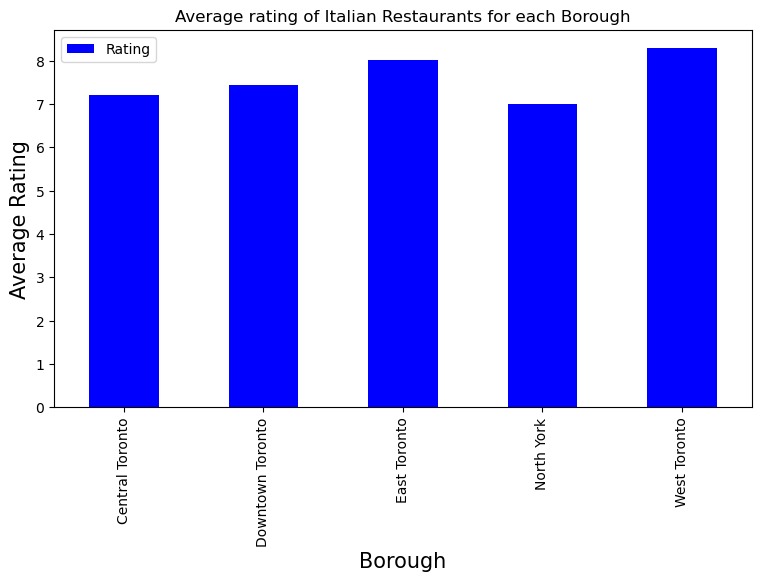

In [21]:
plt.figure(figsize=(9,5), dpi = 100)
plt.title('Average rating of Italian Restaurants for each Borough')
plt.xlabel('Borough', fontsize = 15)
plt.ylabel('Average Rating', fontsize=15)
italian_rest_stats_tor.groupby('Borough').mean()['Rating'].plot(kind='bar', color=clr)
plt.legend()
plt.show()

Italian Restuarants with an average rating of 7 or less by neighborhood

In [48]:
tor_neighborhood_stats=tor_neighborhood_stats[tor_neighborhood_stats['Average Rating']<=8.0]
tor_neighborhood_stats

,Neighbourhood,Average Rating
0,"Bedford Park, Lawrence Manor East",6.600000
1,Berczy Park,7.100000
3,Central Bay Street,6.950000
4,Christie,7.700000
5,"Commerce Court, Victoria Hotel",7.633333
6,Davisville,7.200000
7,Don Mills,7.800000
8,"First Canadian Place, Underground city",7.600000
9,"Garden District, Ryerson",7.650000
10,"Harbourfront East, Union Station, Toronto Islands",6.800000


In [49]:
tor_neighborhood_stats=pd.merge(tor_neighborhood_stats,dfcodes, on='Neighbourhood')
tor_neighborhood_stats=tor_neighborhood_stats[['Borough','Neighbourhood','Latitude','Longitude','Average Rating']]
tor_neighborhood_stats

,Borough,Neighbourhood,Latitude,Longitude,Average Rating
0,North York,"Bedford Park, Lawrence Manor East",43.733283,-79.419750,6.600000
1,Downtown Toronto,Berczy Park,43.644771,-79.373306,7.100000
2,Downtown Toronto,Central Bay Street,43.657952,-79.387383,6.950000
3,Downtown Toronto,Christie,43.669542,-79.422564,7.700000
4,Downtown Toronto,"Commerce Court, Victoria Hotel",43.648198,-79.379817,7.633333
5,Central Toronto,Davisville,43.704324,-79.388790,7.200000
6,North York,Don Mills,43.745906,-79.352188,7.800000
7,North York,Don Mills,43.725900,-79.340923,7.800000
8,Downtown Toronto,"First Canadian Place, Underground city",43.648429,-79.382280,7.600000
9,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937,7.650000


Create a map of restuaranta with rating less than 7.0

In [50]:
address = 'Toronto'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
import folium
# create map of Toronto using latitude and longitude values
tor_map = folium.Map(location=[latitude, longitude], zoom_start=10)
# instantiate a feature group for the ratings in the dataframe
rating = folium.map.FeatureGroup()



In [51]:
# loop through the ratings and add each to the neighborhood feature group
for lat, lng, in tor_neighborhood_stats[['Latitude','Longitude']].values:
    rating.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=10, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

In [55]:
tor_neighborhood_stats['Label']=tor_neighborhood_stats['Neighbourhood']+', '+tor_neighborhood_stats['Borough']+'('+tor_neighborhood_stats['Average Rating'].map(str)+')'
# add pop-up text to each marker on the map
for lat, lng, label in tor_neighborhood_stats[['Latitude','Longitude','Label']].values:
    folium.Marker([lat, lng], popup=label).add_to(tor_map)        
# add ratings to map
tor_map.add_child(rating)